First we will load pandas to open the csv of training data and render a graph.

In [1]:
import os
import pandas as pd

def load_housing_training_data():
    csv_path = os.path.join("datasets", "house-prices-advanced-regression-techniques", "train.csv")
    return pd.read_csv(csv_path)

housing = load_housing_training_data()
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# lets take an inspection of the object
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
# this is how you can get a look at the numerical values
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# lets get a look at one of the 'non-numerical' values 
housing["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

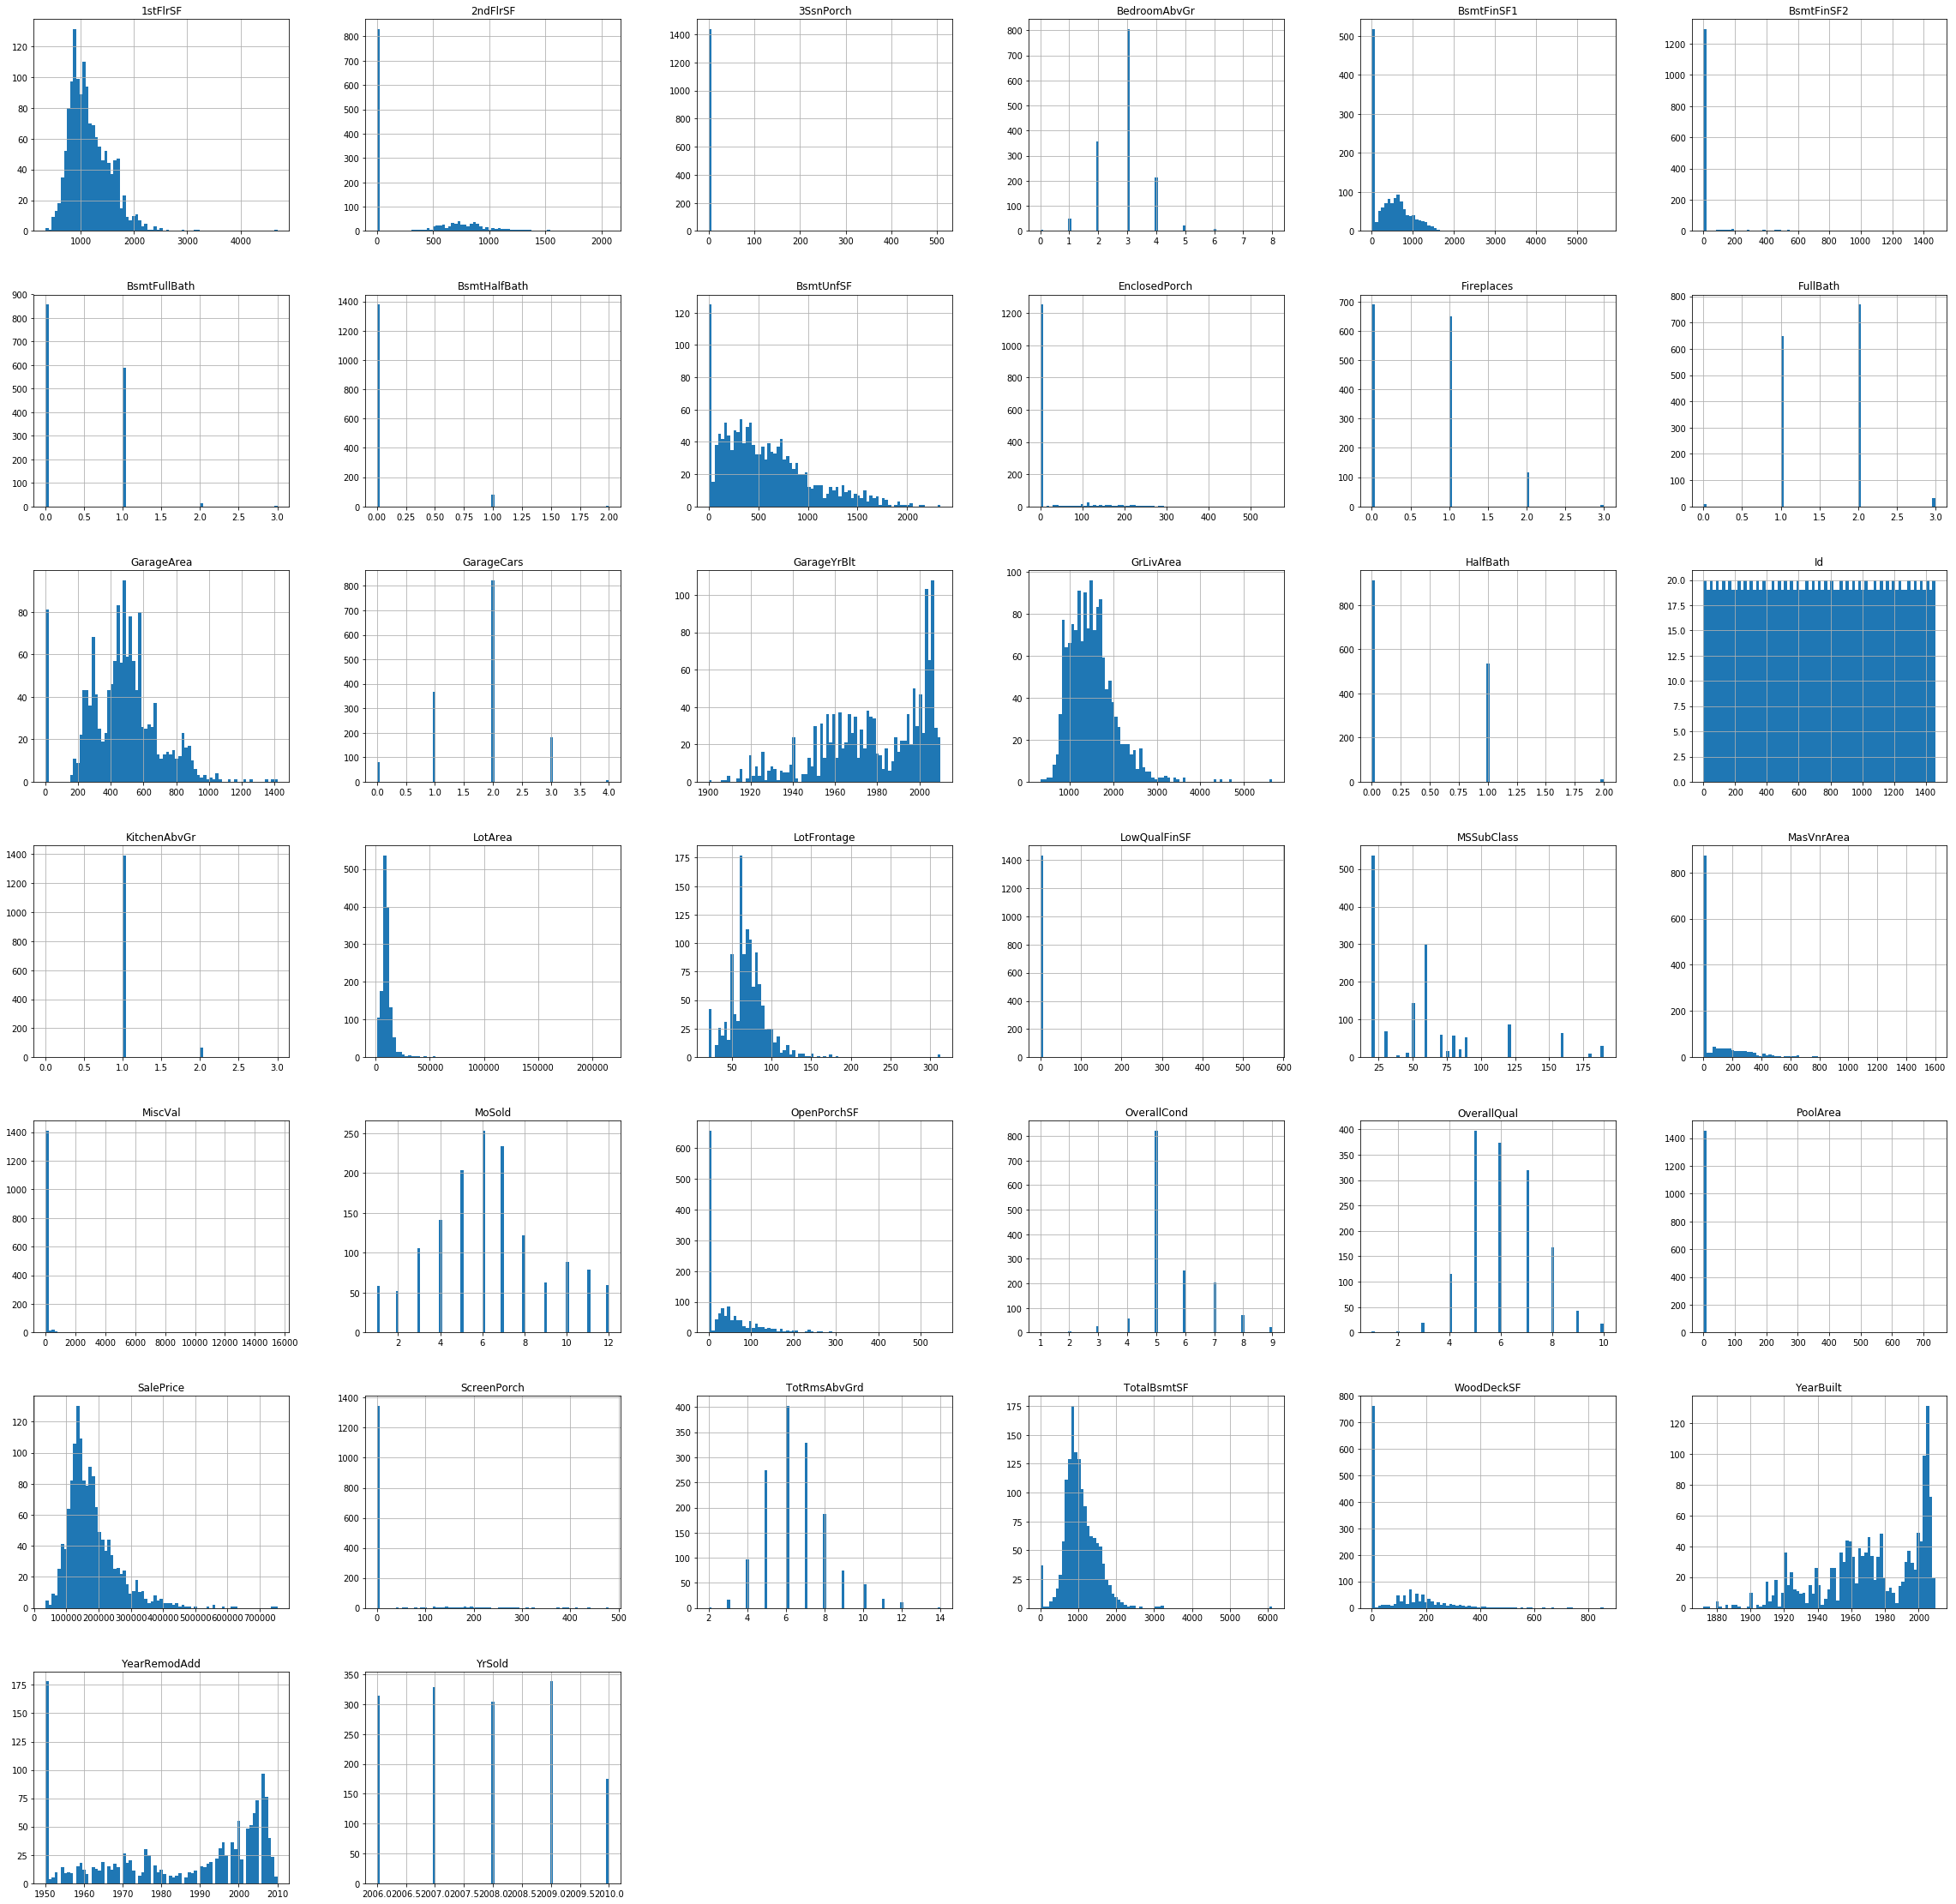

In [11]:
#histogram for each numeric column
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=75, figsize=(40,40))
plt.show()


Lets look at the square footage labels/features
they are the most obviously relevant

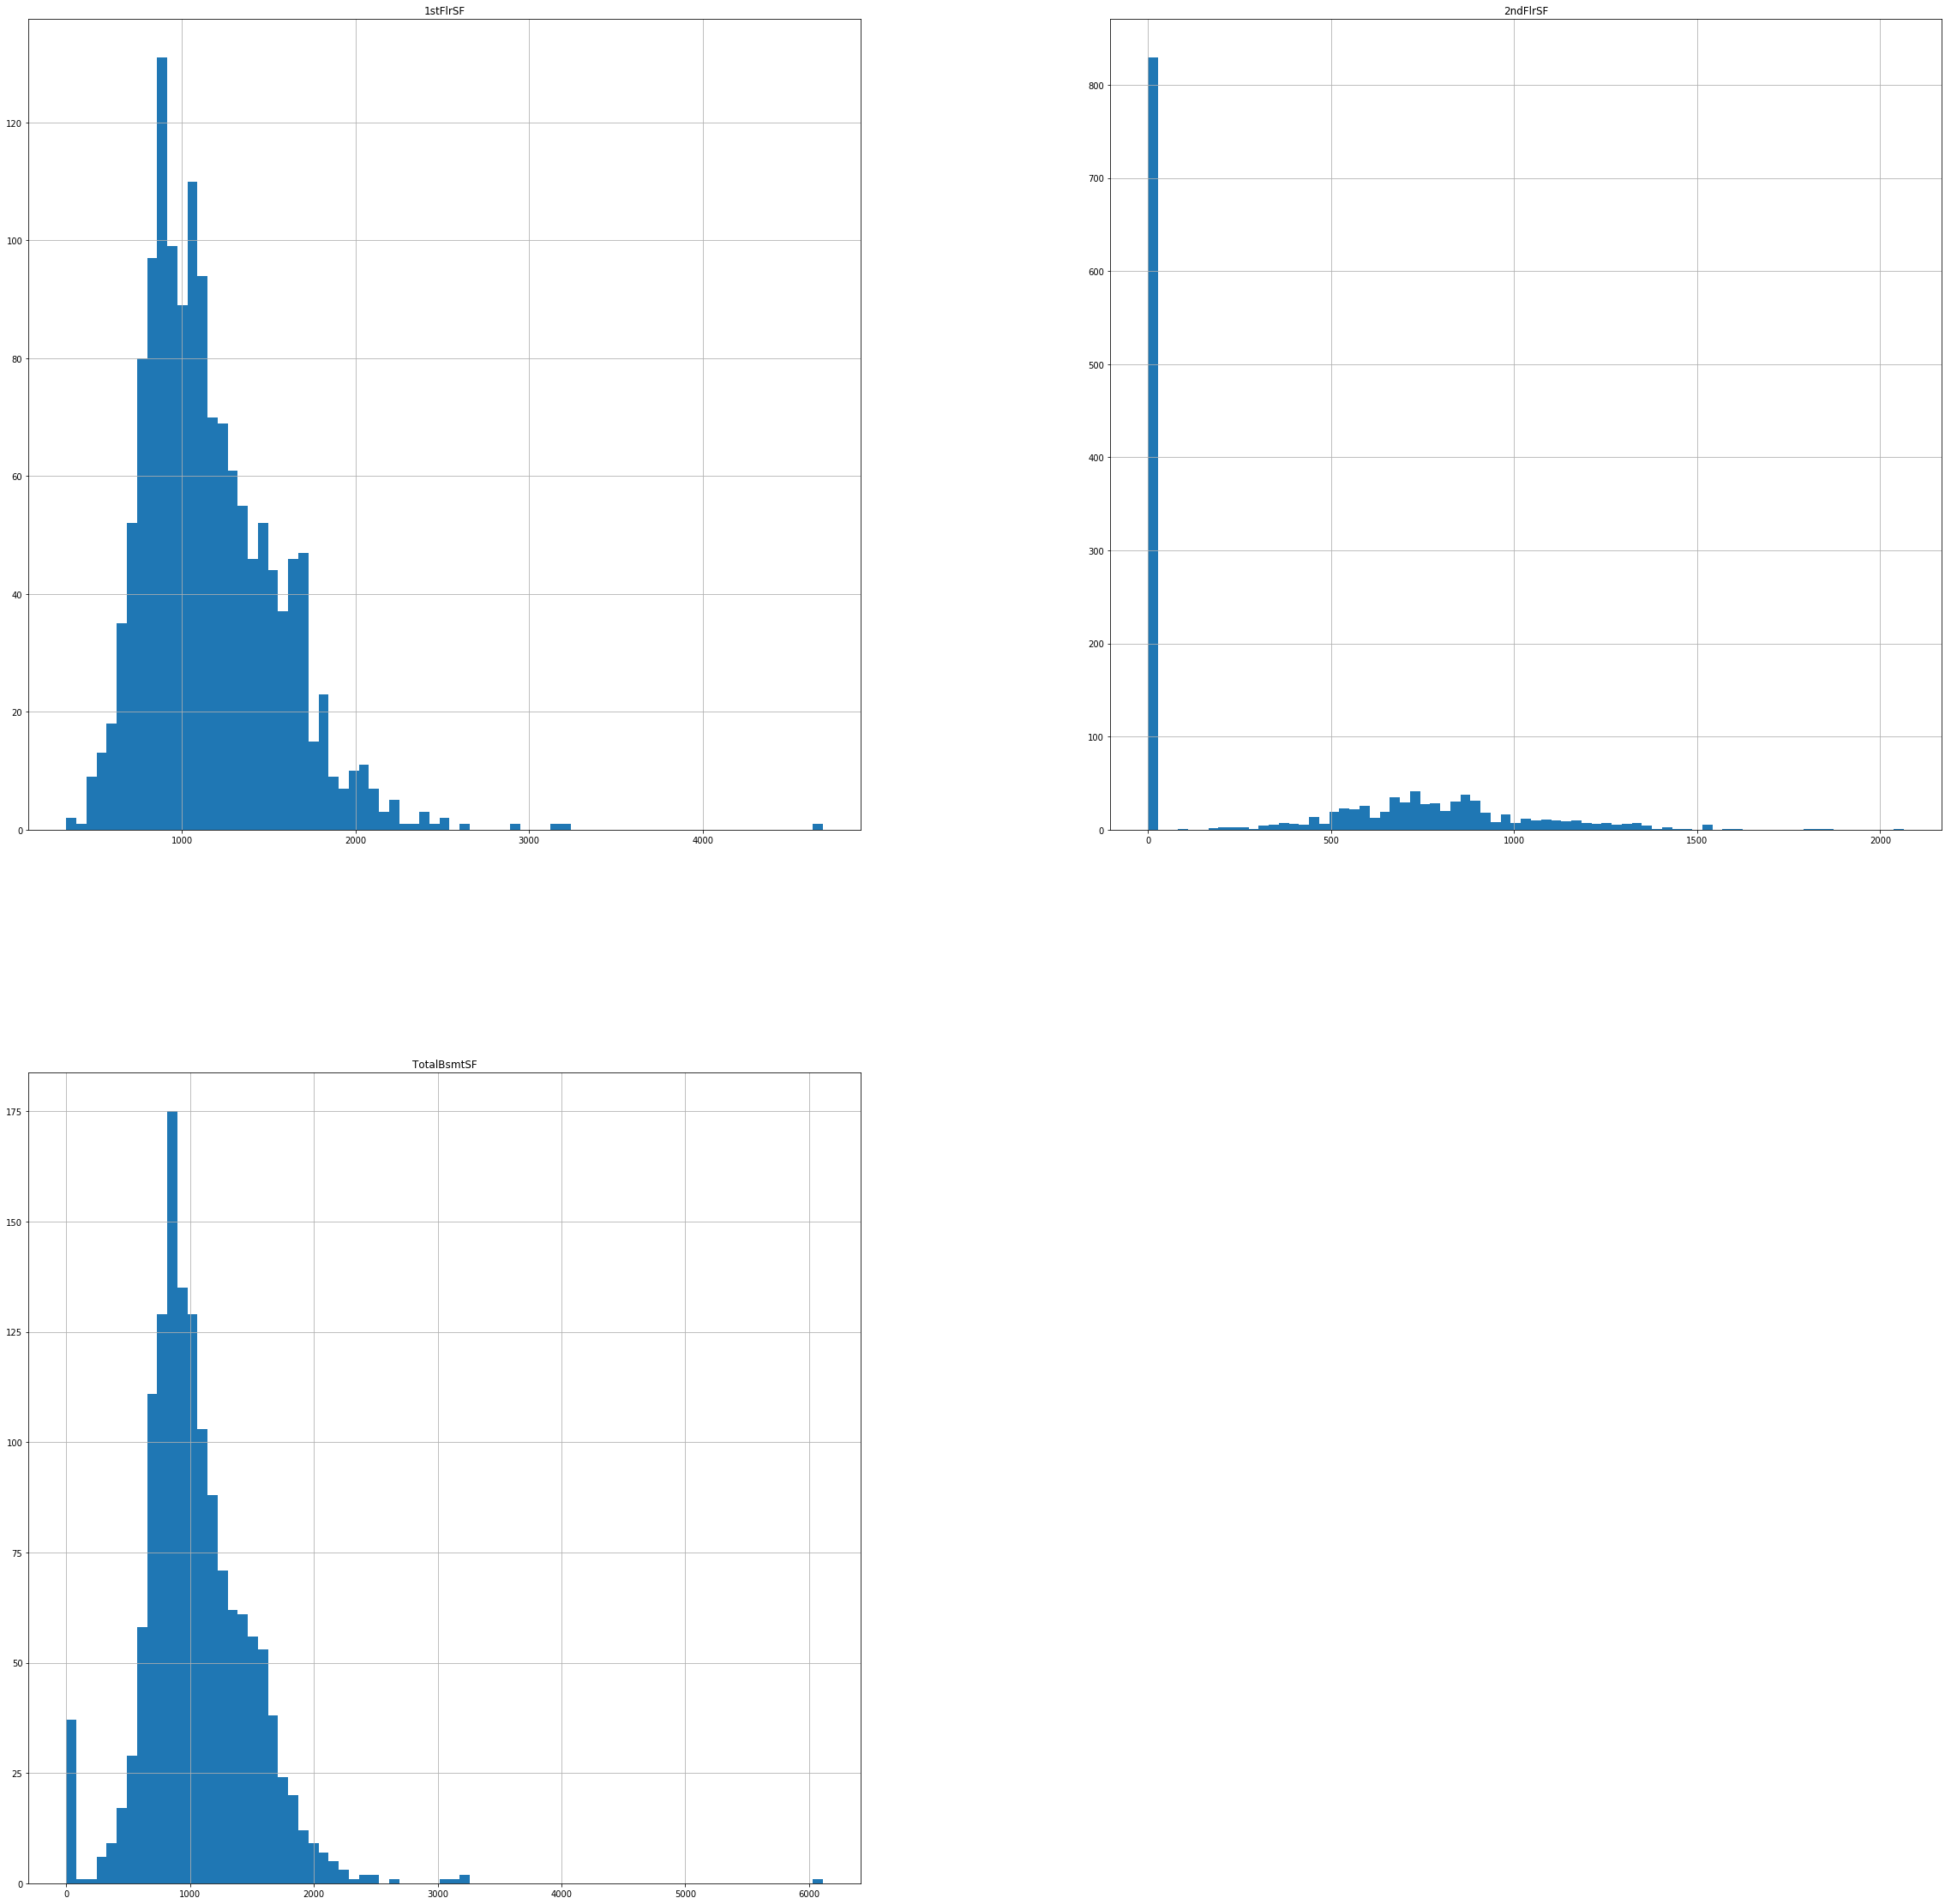

In [20]:
square_footage_labels = [
    "1stFlrSF",
    "2ndFlrSF",
    "TotalBsmtSF", 
]
sqf_frame = pd.DataFrame({ your_key: housing[your_key] for your_key in square_footage_labels })
sqf_frame.hist(bins=75, figsize=(40,40))
plt.show()

Here we can see hat there are a number of houses wihout a second floor and a chunk without a basement,
perhaps these will require "feature engineering"?

The first floor data seems to be normal with few outliers. Seems nice.

lets see what kinda of dwellings have been sold. TODO: figure out how to replace the xticks with words

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

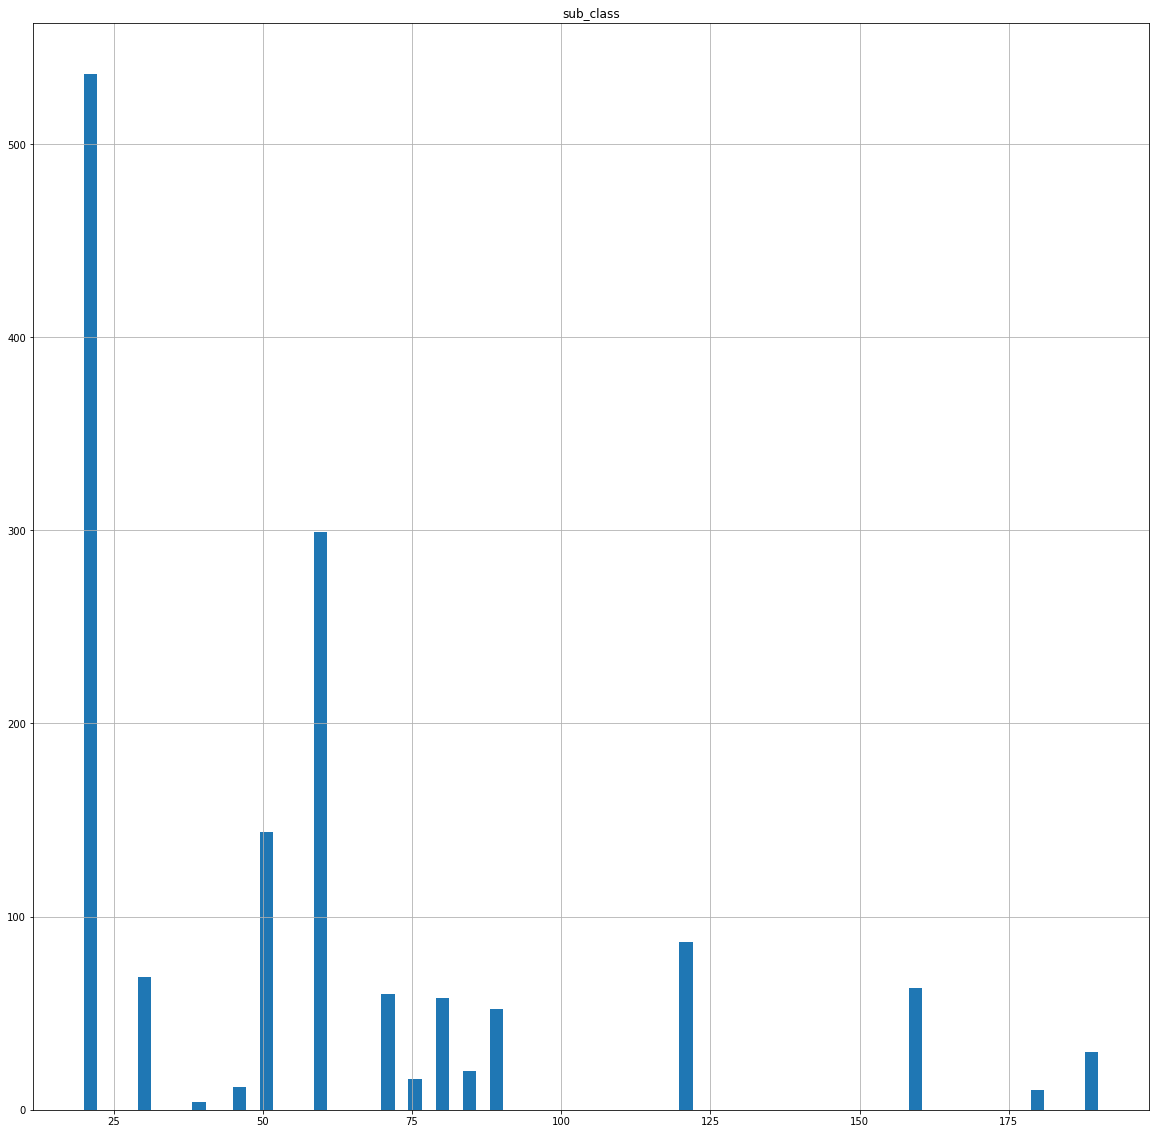

In [83]:
types_of_dwelling = pd.DataFrame({ 
    "sub_class": housing["MSSubClass"],
}).hist(bins=75, figsize=(20,20))
plt.show()

observations

- most 1 story units are 1946 or older
- most 2 story units are 1946 or older
- 3rd most active column is 1-1/2 STORY FINISHED ALL AGES

next lets take a look at the sales price:

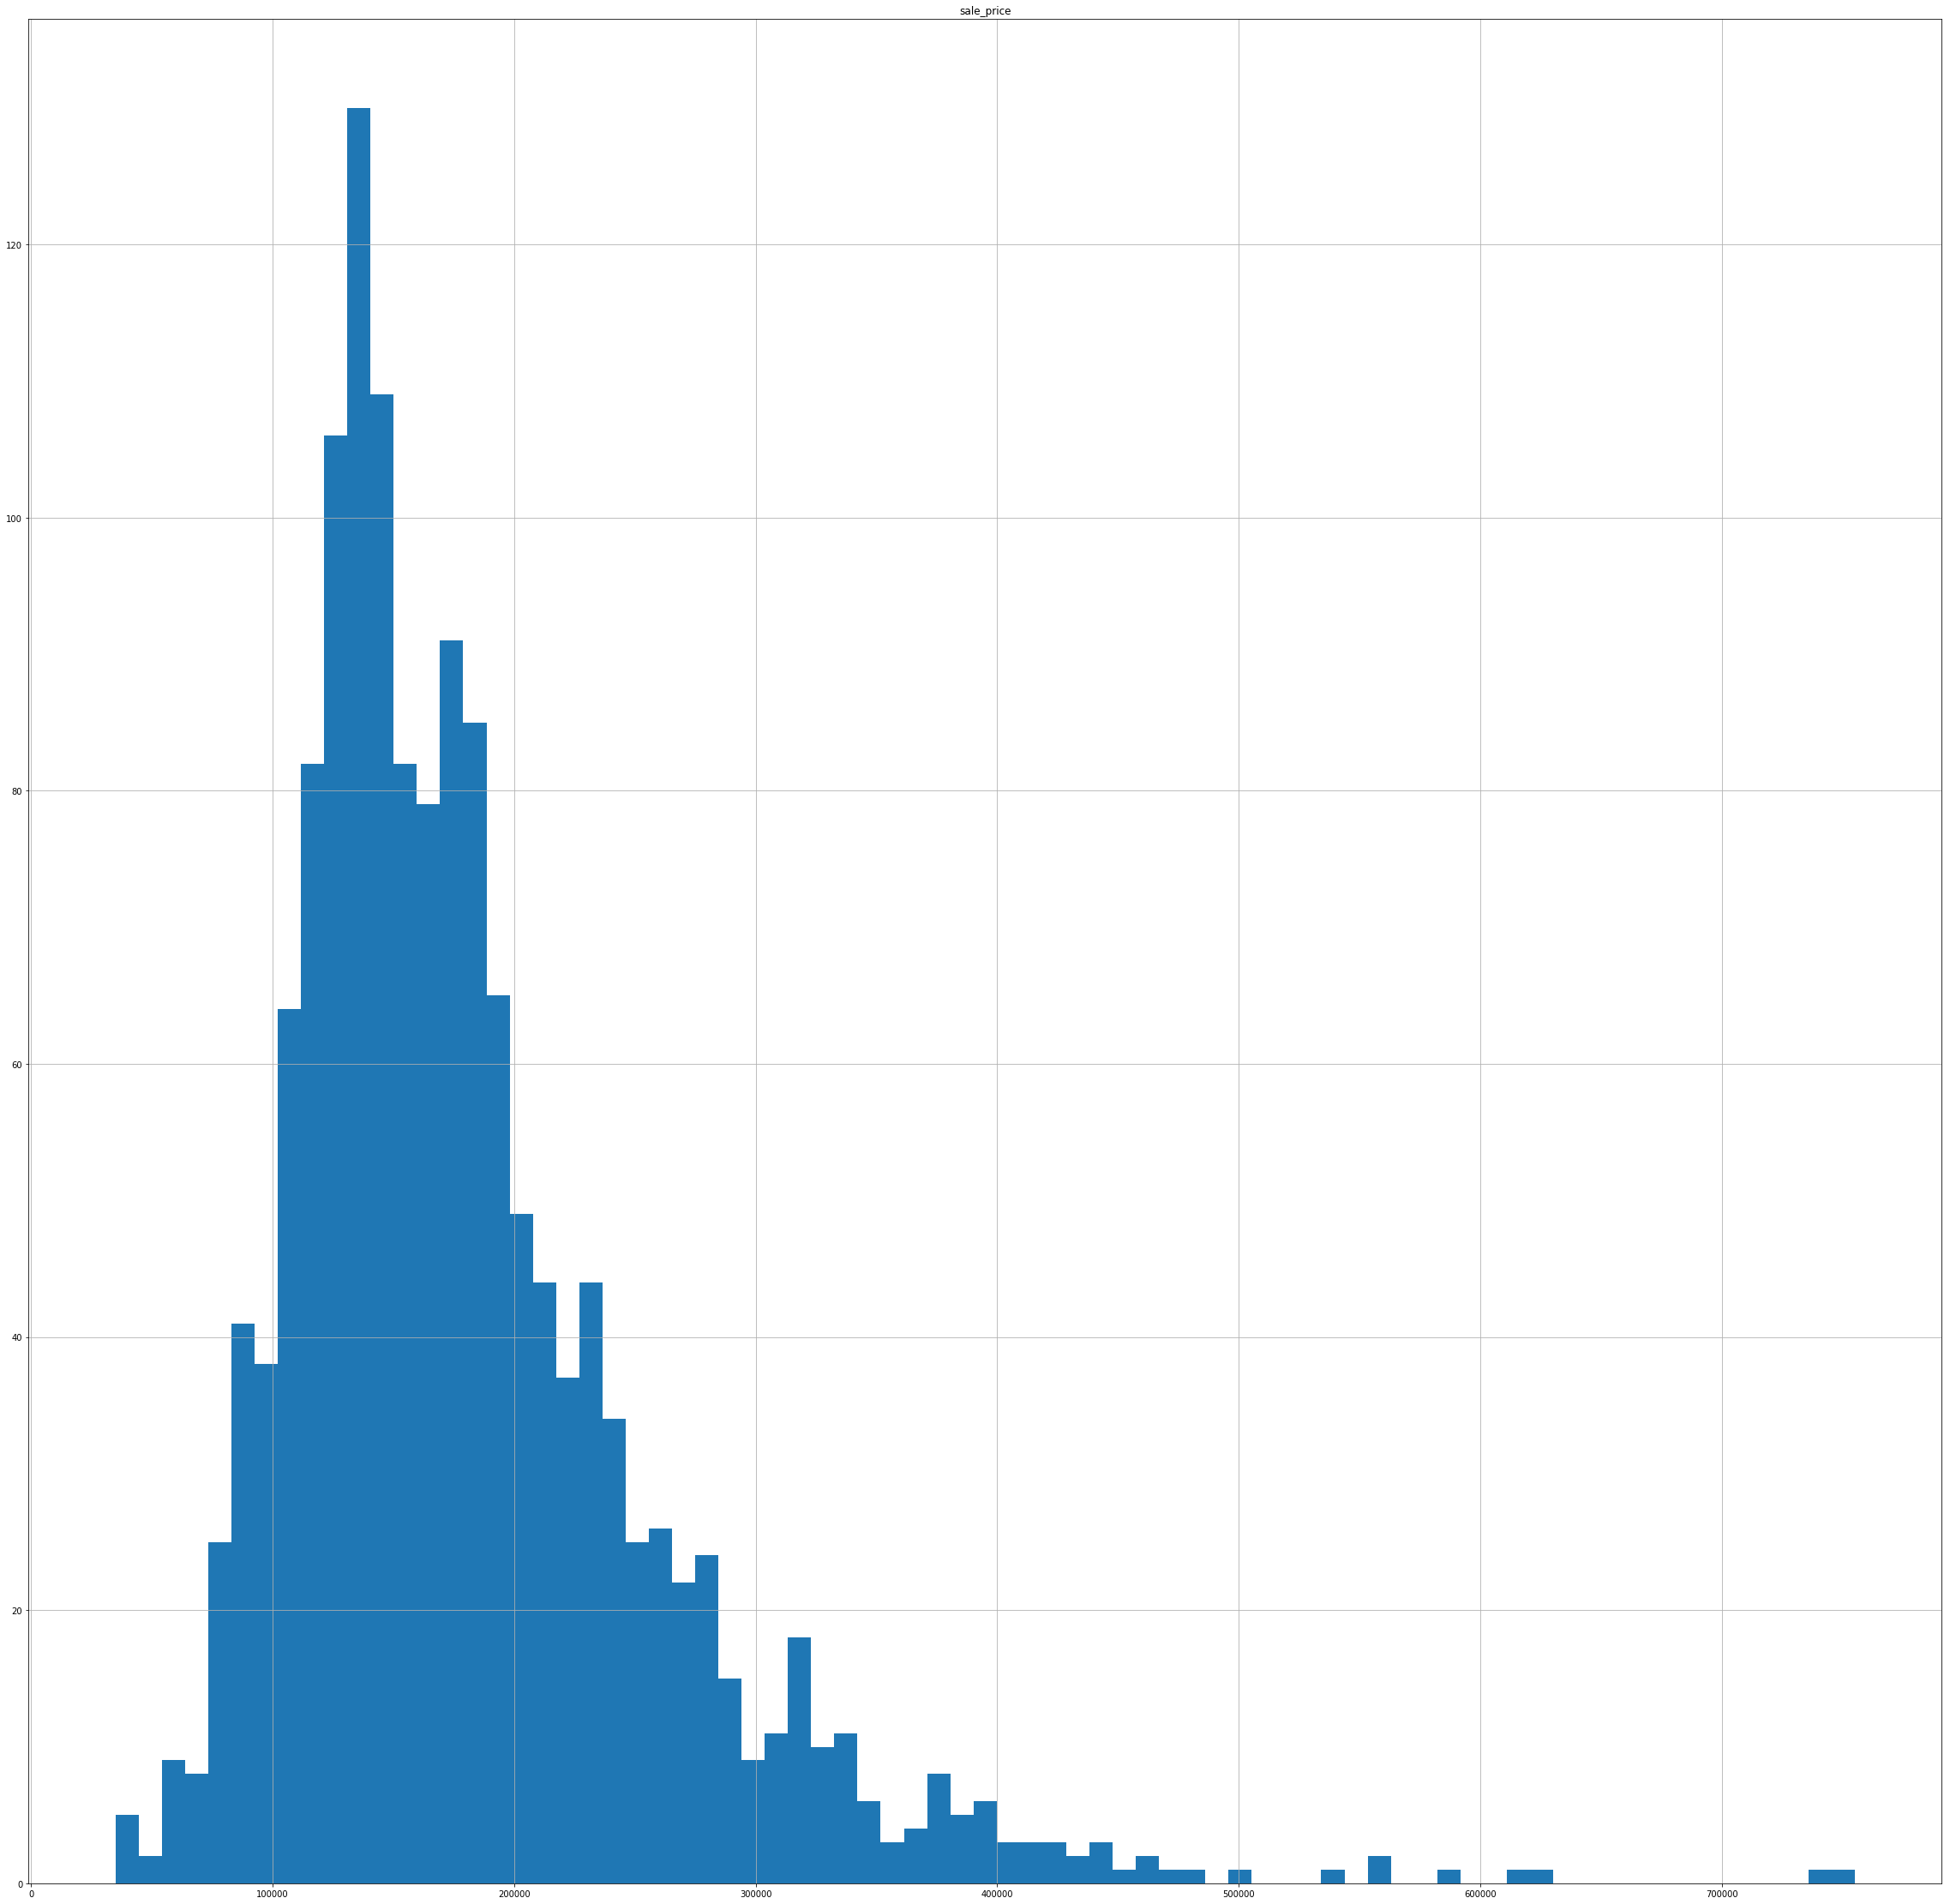

In [34]:
types_of_dwelling = pd.DataFrame({ 
    "sale_price": housing["SalePrice"],
}).hist(bins=75, figsize=(40,40))
plt.show()

looks like the price was mostly in the 100-200k bracket
now we will do scatter plots to further explore the data and find relations.

I would like to do a lat/long but the only location data is for neighborhood
`
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ...
`
One plan to do this type of x/y visualization would be to get the center
long/lat of each neighborhood but then the scatter plot would be N points.
Some type of barchart would be better.

I think instead I'll get the average sale price per neighborhood.

In [56]:
group_by_neighborhood = housing.groupby(by=['Neighborhood'])
neighborhood_data_avg = group_by_neighborhood["SalePrice"].mean().sort_values(ascending=False)
neighborhood_data_count = group_by_neighborhood["SalePrice"].count().sort_values(ascending=False)
# print(neighborhood_data_avg)
# print(neighborhood_data_count)
merged = pd.merge(neighborhood_data_avg, neighborhood_data_count, how='left', on=['Neighborhood'])
print(merged.sort_values(ascending=False, by="SalePrice_y"))
print("~" * 40)
print(merged.sort_values(ascending=False, by="SalePrice_x"))

                SalePrice_x  SalePrice_y
Neighborhood                            
NAmes         145847.080000          225
CollgCr       197965.773333          150
OldTown       128225.300885          113
Edwards       128219.700000          100
Somerst       225379.837209           86
Gilbert       192854.506329           79
NridgHt       316270.623377           77
Sawyer        136793.135135           74
NWAmes        189050.068493           73
SawyerW       186555.796610           59
BrkSide       124834.051724           58
Crawfor       210624.725490           51
Mitchel       156270.122449           49
NoRidge       335295.317073           41
Timber        242247.447368           38
IDOTRR        100123.783784           37
ClearCr       212565.428571           28
SWISU         142591.360000           25
StoneBr       310499.000000           25
Blmngtn       194870.882353           17
MeadowV        98576.470588           17
BrDale        104493.750000           16
Veenker       23

In [78]:
corr_matrix = housing.corr()
top_five = corr_matrix["SalePrice"].sort_values(ascending=False).head(6)
print(top_five)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


The above seems to ignore textual types like 'Neighborhood'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa184ad6e80>,
      dtype=object)

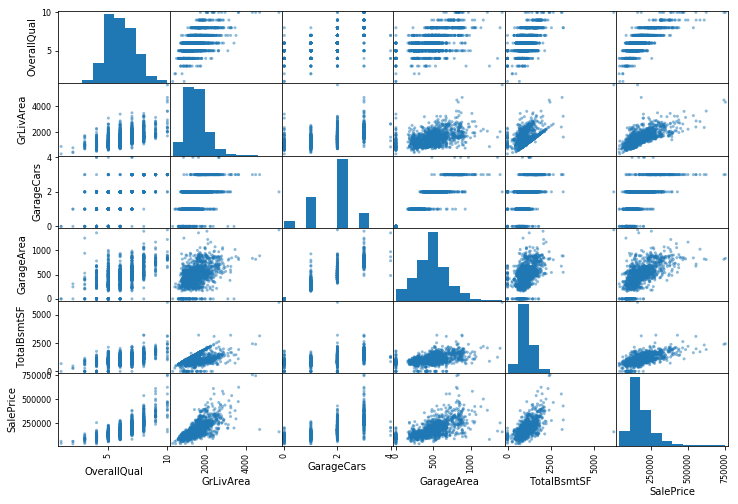

In [77]:
from pandas.plotting import scatter_matrix
attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "SalePrice"]
scatter_matrix(housing[attributes], figsize=(12,8))

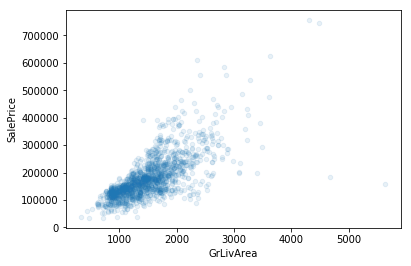

In [80]:
housing.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.1)

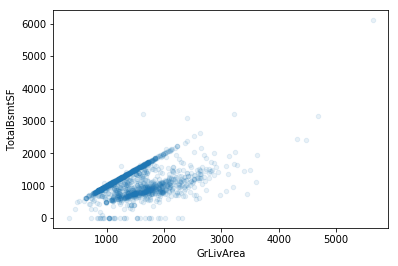

In [81]:
housing.plot(kind="scatter", x="GrLivArea", y="TotalBsmtSF", alpha=0.1)

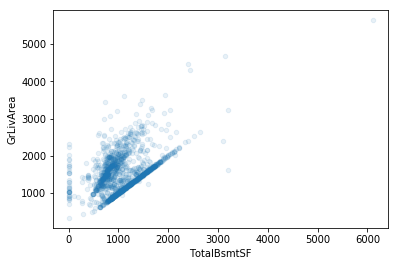

In [82]:
housing.plot(kind="scatter", x="TotalBsmtSF", y="GrLivArea", alpha=0.1)

At this stage I could be looking to derive new features eg (totalsqft / garage cars) and then test the corelation with total price. I'm not sure what to take though... seems like price / sqft would be ideal, but the point is to predict price, so I feel like you can't use it to derive a new feature. 

Next we're going to try and deal with the text values.

In [84]:
from sklearn.preprocessing import OrdinalEncoder
